In [4]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Path to the cleaned CSV file
csv_file = "../data/processed/cleaned_sales_data.csv"

# Load the cleaned data
df = pd.read_csv(csv_file)
df.head()

,Transaction_ID,Date,Time,Product_ID,Category,Product_Name,Brand,Price,Quantity,Total_Spent,Payment_Method,Store_Location
0,T00001,2024-08-24,11:54:00,MGT001,Men'S Graphic Tees,Sunset Vibes Tee,Riot Society,24.99,3,74.97,Credit Card,"San Diego, CA"
1,T00002,2024-07-29,12:22:00,M2F001,Men'S 2 For $34 Tees,Skater Logo Tee,Riot Spciety,17.99,5,85.99,Cash,"San Diego, CA"
2,T00003,2024-08-21,17:12:00,MGT001,Men'S Graphic Tees,Sunset Vibes Tee,Riot Society,24.99,1,24.99,Cash,"San Diego, CA"
3,T00004,2024-07-28,13:58:00,SH001,Shoes,Old Skool Sneakers,Vans,59.99,5,299.95,Cash,"San Diego, CA"
4,T00005,2024-08-19,13:23:00,SH001,Shoes,Old Skool Sneakers,Vans,59.99,4,239.96,Credit Card,"San Diego, CA"


In [6]:
# Path to the SQLite database
db_path = "../data/tillys_sales.db"

# Connect to the database (creates it if it doesn't exist)
conn = sqlite3.connect(db_path)
print(f"Connected to database at {db_path}")

# Save the DataFrame to a table
table_name = "sales"
df.to_sql(table_name, conn, if_exists="replace", index=False)
print(f"Data saved to table '{table_name}' in database '{db_path}'")

Connected to database at ../data/tillys_sales.db
Data saved to table 'sales' in database '../data/tillys_sales.db'


In [7]:
# Helper function to run SQL queries and return a DataFrame
def run_query(query):
    return pd.read_sql_query(query, conn)

In [8]:
# Analysis 1: View the first few rows of the sales table
query = "SELECT * FROM sales LIMIT 5;"
sales_preview = run_query(query)
print("First 5 rows of sales data:")
print(sales_preview)

First 5 rows of sales data:
  Transaction_ID        Date      Time Product_ID              Category  \
0         T00001  2024-08-24  11:54:00     MGT001    Men'S Graphic Tees   
1         T00002  2024-07-29  12:22:00     M2F001  Men'S 2 For $34 Tees   
2         T00003  2024-08-21  17:12:00     MGT001    Men'S Graphic Tees   
3         T00004  2024-07-28  13:58:00      SH001                 Shoes   
4         T00005  2024-08-19  13:23:00      SH001                 Shoes   

         Product_Name         Brand  Price  Quantity  Total_Spent  \
0    Sunset Vibes Tee  Riot Society  24.99         3        74.97   
1     Skater Logo Tee  Riot Spciety  17.99         5        85.99   
2    Sunset Vibes Tee  Riot Society  24.99         1        24.99   
3  Old Skool Sneakers          Vans  59.99         5       299.95   
4  Old Skool Sneakers          Vans  59.99         4       239.96   

  Payment_Method Store_Location  
0    Credit Card  San Diego, CA  
1           Cash  San Diego, CA  
2   

In [9]:
# Analysis 2: Top-Selling Products
query = """
SELECT Product_Name, SUM(Quantity) AS Total_Quantity
FROM sales
GROUP BY Product_Name
Order BY Total_Quantity DESC
LIMIT 10;
"""
top_products = run_query(query)
print("Top-Selling Products:")
print(top_products)

Top-Selling Products:
          Product_Name  Total_Quantity
0     High Rise Skinny             332
1      Skater Logo Tee             327
2        Nike SB Chron             325
3   Old Skool Sneakers             317
4  Nike Sportswear Tee             298
5       Slim Fit Denim             291
6    Heritage Backpack             283
7     Sunset Vibes Tee             274
8       Basic Tank Top             266
9  Right Pack Backpack             225


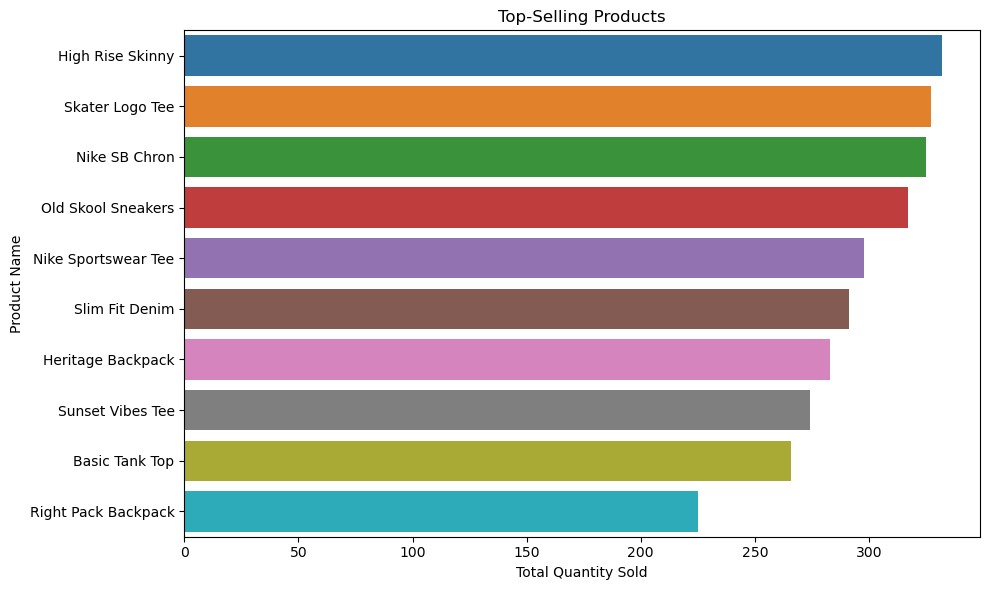

In [10]:
# Visualizing: Top-Selling Products
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x="Total_Quantity", y="Product_Name", orient="h")
plt.title("Top-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

In [12]:
# Analysis 3: Total Sales by Category
query = """
SELECT Category, SUM(Total_Spent) AS Total_Revenue
FROM sales
GROUP BY Category
ORDER BY Total_Revenue DESC;
"""
category_sales = run_query(query)
print("Total Sales by Category:")
print(category_sales)

Total Sales by Category
                 Category  Total_Revenue
0                   Shoes       61263.58
1               Backpacks       28224.92
2  Women'S Bogo Rsq Jeans       13347.33
3    Men'S Bogo Rsq Jeans       11622.65
4         Men'S Nike Tees       10427.02
5      Men'S Graphic Tees        6847.26
6    Men'S 2 For $34 Tees        5627.31
7  Women'S 4 For $25 Tops        2088.86


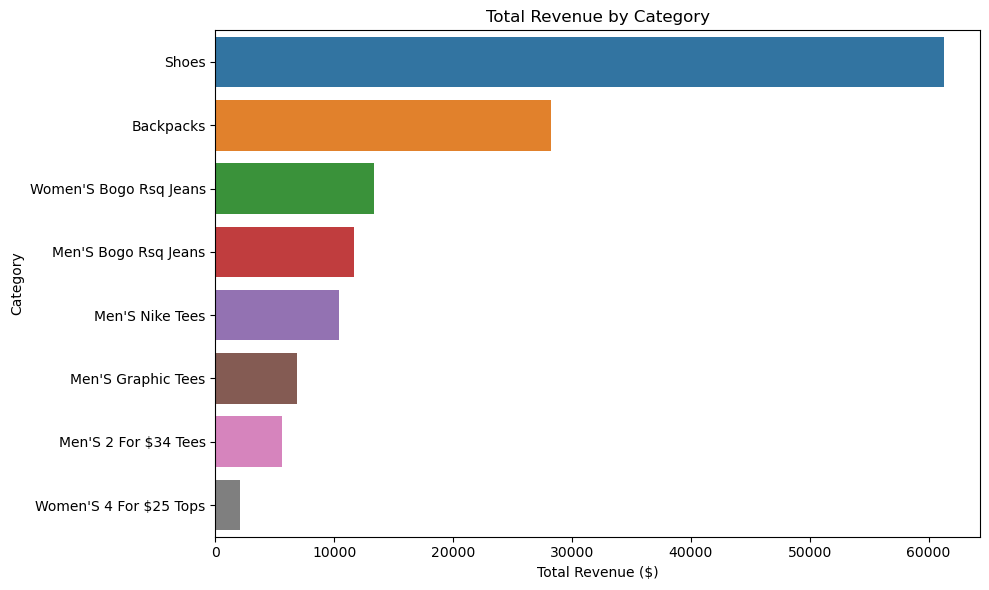

In [14]:
# Visualization: Total Sales by Category
plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x="Total_Revenue", y="Category", orient="h")
plt.title("Total Revenue by Category")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

In [15]:
# Analysis 4: Sales Trends Over Time
query = """
SELECT Date, SUM(Total_Spent) AS Daily_Sales
FROM sales
GROUP BY Date
ORDER BY Date;
"""
sales_trends = run_query(query)
print("Sales Trends Over Time:")
print(sales_trends.head())

Sales Trends Over Time:
         Date  Daily_Sales
0  2024-07-15      1530.64
1  2024-07-16      1276.75
2  2024-07-17      2576.60
3  2024-07-18      2161.66
4  2024-07-19      2114.60


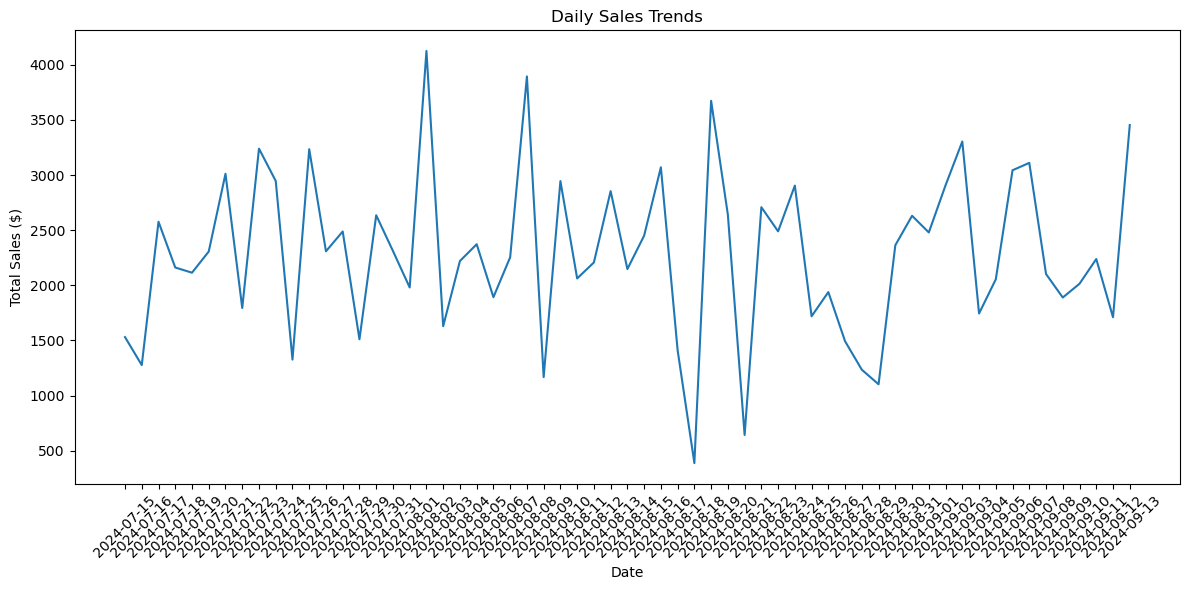

In [18]:
# Visualization: Sales Trends Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=sales_trends, x="Date", y="Daily_Sales")
plt.title("Daily Sales Trends")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Analysis 5: Payment Methods Distribution
query = """
SELECT Payment_Method, COUNT(*) AS Payment_Count
FROM sales
GROUP BY Payment_Method
ORDER BY Payment_Count DESC;
"""
payment_methods = run_query(query)
print("Payment Methods Distribution:")
print(payment_methods)

Payment Methods Distribution:
   Payment_Method  Payment_Count
0       Gift Card            228
1      Debit Card            214
2  Mobile Payment            195
3     Credit Card            190
4            Cash            173


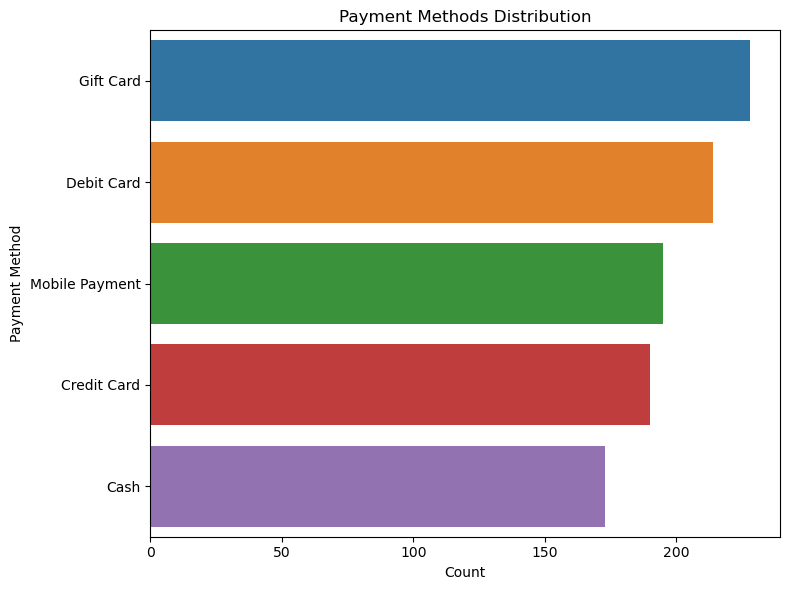

In [20]:
# Visualization: Payment Methods Distribution
plt.figure(figsize=(8,6))
sns.barplot(data=payment_methods, x="Payment_Count", y="Payment_Method", orient="h")
plt.title("Payment Methods Distribution")
plt.xlabel("Count")
plt.ylabel("Payment Method")
plt.tight_layout()
plt.show()

In [22]:
# Analysis 6: Best-Selling Brands
query = """
SELECT Brand, SUM(Total_Spent) AS Total_Revenue
FROM sales
GROUP BY Brand
ORDER BY Total_Revenue DESC
LIMIT 5;
"""
brand_sales = run_query(query)
print("Best-Selling Brands:")
print(brand_sales)

Best-Selling Brands:
      Brand  Total_Revenue
0      Nike       52673.77
1       RSQ       27058.84
2      Vans       19016.83
3  Herschel       16977.17
4  JanSport       11247.75


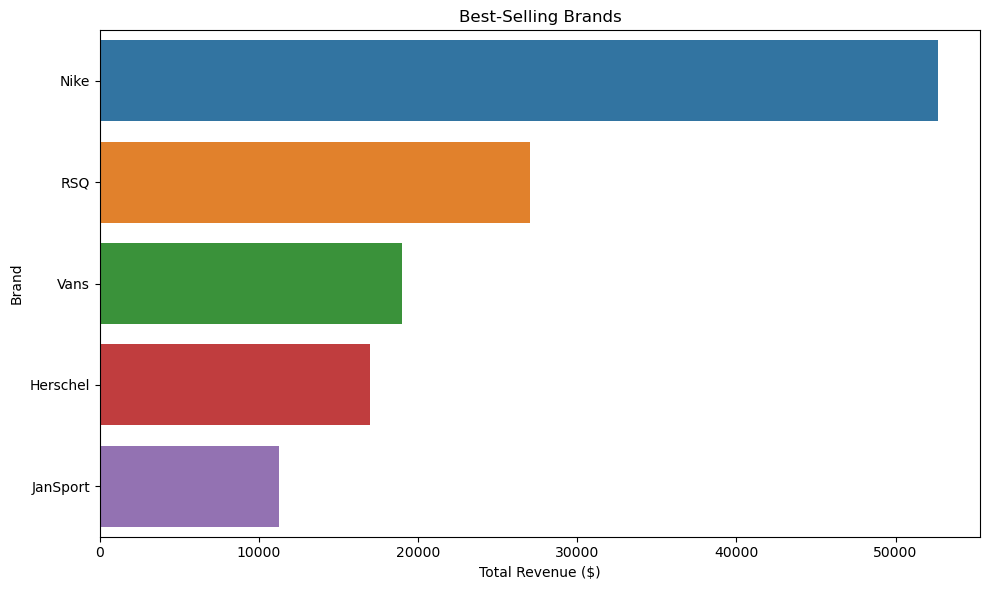

In [23]:
# Visualizations: Best-Selling Brands
plt.figure(figsize=(10,6))
sns.barplot(data=brand_sales, x="Total_Revenue", y="Brand", orient="h")
plt.title("Best-Selling Brands")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

In [24]:
# Close the connection
conn.close()
print("Database connection closed")

Database connection closed
